## scraping twitter data

In [1]:
!pip install snscrape
!pip install tweeter-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 KB 635.1 kB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tweeter-preprocessor (from versions: none)
ERROR: No matching distribution found for tweeter-preprocessor


In [2]:
import snscrape.modules.twitter as sn
import pandas as pd

In [ ]:


keywords=['ChatGpt']
start_date= '2022-01-01'# YYYY-MM-DD
end_date = '2023-01-26'#YYYY-MM-DD
language = 'en'
number_of_tweets = 10000

tweets_list = []
count = 0
c = 0
# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sn.TwitterSearchScraper(f'{keywords} since:{start_date} until:{end_date} lang:{language} ').get_items()):
    count += 1
    if count == 10000:
        c += 1
        print(f"JOEPIE:{c}")
        count = 0
        
    if i>=number_of_tweets:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.mentionedUsers, tweet.user.location])
    
    
# Creating a dataframe from the tweets list above 
tweets_df_2021 = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Mentioned', 'Location'])

tweets_df_2021

<ipython-input-3-2d113a0e42dd>:20: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.mentionedUsers, tweet.user.location])


## Preprocess data

In [ ]:
import re
tweets_df_2021['hashtag'] = tweets_df_2021['Text'].apply(lambda x: re.findall(r"#(\w+)", x))
tweets_df_2021

In [ ]:
!pip install tweet-preprocessor
!pip install ekphrasis

In [ ]:

from ekphrasis.classes.segmenter import Segmenter

In [ ]:
import preprocessor as p
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = TweetTokenizer()
stop_words = set(stopwords.words('english'))

In [ ]:
# preproces tweets 2021


cleaned = []
for tweet in tweets_df_2021['Text']:
    tweet = p.clean(tweet) # removes URLs, Mentions, Reserved words (RT, FAV), and Emojis
    tweet = tweet.lower() # lowecase
    tweet = re.sub(r'[^\w\s]', '', (tweet)) # remove punctuation
    tweet = re.sub('chatgpt', '', (tweet))
    tweet = re.sub('gpt', '', (tweet))

    tweet = lemmatizer.lemmatize(tweet) # lemmanize tweets
    tweet = w_tokenizer.tokenize(tweet) # tokenize tweets
    cleaned.append(tweet)

tweets_df_2021['Cleaned'] = cleaned
tweets_df_2021['Cleaned']

0       [how, and, other, new, ai, tools, are, being, ...
1       [seems, like, your, perspective, of, life, is,...
2       [am, i, the, only, one, not, impressed, by, ch...
3       [having, chat, write, conspiracy, theorys, abo...
4       [the, said, im, not, putting, astrologers, out...
                              ...                        
9995    [clears, the, mba, test, for, a, top, business...
9996    [the, metaverse, amp, opening, doors, for, bla...
9997    [this, whole, business, reminds, me, of, the, ...
9998    [the, tool, itself, who, owns, the, model, tha...
9999    [unpopular, opinion, chat, is, worthless, unti...
Name: Cleaned, Length: 10000, dtype: object

In [ ]:
# remove stopwords

In [ ]:
tweets_df_2021['Cleaned'] = tweets_df_2021['Cleaned'].apply(lambda x: [item for item in x if item not in stop_words])
tweets_df_2021

,Datetime,Tweet Id,Text,Username,Mentioned,Location,hashtag,Cleaned
0,2023-01-25 23:59:59+00:00,1618398306576773123,How ChatGPT and other new AI tools are being u...,marigo,None,Finland,[],"[new, ai, tools, used, lawyers, architects, co..."
1,2023-01-25 23:59:59+00:00,1618398305314308097,@dj_myleaX @jordanbpeterson @wef Seems like yo...,JamesSeabridge,"[https://twitter.com/dj_myleaX, https://twitte...","Seattle, WA",[],"[seems, like, perspective, life, small, think,..."
2,2023-01-25 23:59:11+00:00,1618398105417953280,@EvasTeslaSPlaid Am I the only one not impress...,patw3268,[https://twitter.com/EvasTeslaSPlaid],"Tampa, FL",[],"[one, impressed, chat, really, artificial, int..."
3,2023-01-25 23:59:06+00:00,1618398085419524103,Having chat Gpt write conspiracy theorys about...,Patrick44640996,None,,[],"[chat, write, conspiracy, theorys, jfk, extrem..."
4,2023-01-25 23:58:55+00:00,1618398040020365313,The Chatgpt said I’m not putting astrologers o...,MeganMistakes,None,Check out my links to find me,[],"[said, im, putting, astrologers, outta, business]"
...,...,...,...,...,...,...,...,...
9995,2023-01-25 12:36:40+00:00,1618226343912546305,#ChatGPT clears the MBA test for a top busines...,TechStoryin,None,United States,[ChatGPT],"[clears, mba, test, top, business, school]"
9996,2023-01-25 12:36:36+00:00,1618226328666529792,The Metaverse &amp; ChatGPT Opening Doors for ...,wmjackson,None,Global,[],"[metaverse, amp, opening, doors, blacks, hispa..."
9997,2023-01-25 12:36:33+00:00,1618226316318478336,This whole #ChatGPT business reminds me of The...,OkkiPepernoot,None,"Den Haag, Nederland",[ChatGPT],"[whole, business, reminds, sorcerers, apprenti..."
9998,2023-01-25 12:36:32+00:00,1618226312552022028,2️⃣ THE TOOL ITSELF - Who owns the model that...,franklingraves,None,"Nashville, TN",[],"[tool, owns, model, thats, built, data, sets, ..."


# wordcloud 

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# list to string
tweets_df_2021['Cleaned_string'] = [' '.join(map(str, l)) for l in tweets_df_2021['Cleaned']]


In [ ]:
# function to create worldcloud
def create_wordcloud(text):
    wc = WordCloud(background_color="white",
                  max_words=3000,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


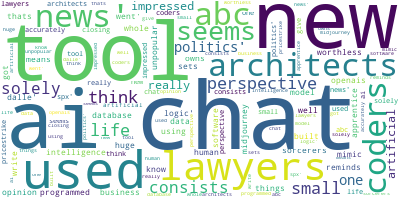

In [ ]:
# create wordcloud from cleaned tweets 2021
create_wordcloud(tweets_df_2021["Cleaned_string"].values)

## Sentiment analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# 2021
negative_list = []
neutral_list =[]
positive_list =[]
compound_list =[]
labels = []
for i in tweets_df_2021['Cleaned_string']:
    # calculate sentiment score
    score = SentimentIntensityAnalyzer().polarity_scores(i)
    negative_list.append(score['neg'])
    neutral_list.append(score['neu'])
    positive_list.append(score['pos'])
    compound_list.append(score['compound'])
    neg = score['neg']
    pos = score['pos']

    if pos>neg:
        labels.append('Positive')
    if pos<neg:
        labels.append('Negative')
    if pos==neg:
        labels.append('Neutral')
    
tweets_df_2021['Neg_score'] = negative_list
tweets_df_2021['Neu_score'] = neutral_list
tweets_df_2021['Pos_score'] = positive_list
tweets_df_2021['Compound_score'] = compound_list
tweets_df_2021['Label'] = labels
    
tweets_df_2021

,Datetime,Tweet Id,Text,Username,Mentioned,Location,hashtag,Cleaned,Cleaned_string,Neg_score,Neu_score,Pos_score,Compound_score,Label
0,2023-01-25 23:59:59+00:00,1618398306576773123,How ChatGPT and other new AI tools are being u...,marigo,None,Finland,[],"[new, ai, tools, used, lawyers, architects, co...",new ai tools used lawyers architects coders ab...,0.000,1.000,0.000,0.0000,Neutral
1,2023-01-25 23:59:59+00:00,1618398305314308097,@dj_myleaX @jordanbpeterson @wef Seems like yo...,JamesSeabridge,"[https://twitter.com/dj_myleaX, https://twitte...","Seattle, WA",[],"[seems, like, perspective, life, small, think,...",seems like perspective life small think consis...,0.000,0.762,0.238,0.3612,Positive
2,2023-01-25 23:59:11+00:00,1618398105417953280,@EvasTeslaSPlaid Am I the only one not impress...,patw3268,[https://twitter.com/EvasTeslaSPlaid],"Tampa, FL",[],"[one, impressed, chat, really, artificial, int...",one impressed chat really artificial intellige...,0.000,0.578,0.422,0.8307,Positive
3,2023-01-25 23:59:06+00:00,1618398085419524103,Having chat Gpt write conspiracy theorys about...,Patrick44640996,None,,[],"[chat, write, conspiracy, theorys, jfk, extrem...",chat write conspiracy theorys jfk extremely en...,0.293,0.431,0.275,-0.0534,Negative
4,2023-01-25 23:58:55+00:00,1618398040020365313,The Chatgpt said I’m not putting astrologers o...,MeganMistakes,None,Check out my links to find me,[],"[said, im, putting, astrologers, outta, business]",said im putting astrologers outta business,0.000,1.000,0.000,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2023-01-25 12:36:40+00:00,1618226343912546305,#ChatGPT clears the MBA test for a top busines...,TechStoryin,None,United States,[ChatGPT],"[clears, mba, test, top, business, school]",clears mba test top business school,0.000,0.563,0.437,0.2732,Positive
9996,2023-01-25 12:36:36+00:00,1618226328666529792,The Metaverse &amp; ChatGPT Opening Doors for ...,wmjackson,None,Global,[],"[metaverse, amp, opening, doors, blacks, hispa...",metaverse amp opening doors blacks hispanics c...,0.000,1.000,0.000,0.0000,Neutral
9997,2023-01-25 12:36:33+00:00,1618226316318478336,This whole #ChatGPT business reminds me of The...,OkkiPepernoot,None,"Den Haag, Nederland",[ChatGPT],"[whole, business, reminds, sorcerers, apprenti...",whole business reminds sorcerers apprentice kn...,0.000,0.769,0.231,0.2732,Positive
9998,2023-01-25 12:36:32+00:00,1618226312552022028,2️⃣ THE TOOL ITSELF - Who owns the model that...,franklingraves,None,"Nashville, TN",[],"[tool, owns, model, thats, built, data, sets, ...",tool owns model thats built data sets software...,0.000,1.000,0.000,0.0000,Neutral


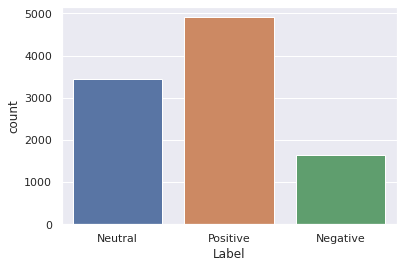

In [ ]:
# generate bar plot
import seaborn as sns
sns.set(style="darkgrid")

ax = sns.countplot(x="Label", data=tweets_df_2021)

## Ngrams

In [ ]:
from collections import defaultdict

In [ ]:
def generate_N_grams(text,ngram=1):
    words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
    temp=zip(*[words[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    return ans

In [ ]:
def plot_bar_graph(pd1,pd2,color,label,n):
    plt.figure(1,figsize=(16,4))
    plt.bar(pd1,pd2, color =color,
            width = 0.4)
    plt.xticks(fontsize=8)

    plt.xlabel(label)
    plt.ylabel("Count")
    plt.title("Top 5 "+label+" "+n+" ANALYSIS")
    plt.show()

In [ ]:
def creating_n_grams(df,n,Type):
    positiveValues=defaultdict(int)
    negativeValues=defaultdict(int)
    neutralValues=defaultdict(int)
    for text in df[df.Label=="Positive"].Cleaned_string:
        for word in generate_N_grams(text,n):
            positiveValues[word]+=1
            
    for text in df[df.Label=="Neutral"].Cleaned_string:
        for word in generate_N_grams(text,n):
            neutralValues[word]+=1

    for text in df[df.Label=="Negative"].Cleaned_string:
        for word in generate_N_grams(text,n):
            negativeValues[word]+=1
            
    df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
    df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
    df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))
    
    pd1=df_positive[0][:5]
    pd2=df_positive[1][:5]
    ned1=df_negative[0][:5]
    ned2=df_negative[1][:5]
    nud1=df_neutral[0][:5]
    nud2=df_neutral[1][:5]
    
    plot_bar_graph(pd1,pd2,"green","positive words",Type)
    plot_bar_graph(ned1,ned2,"red","Negative words",Type)
    plot_bar_graph(nud1,nud2,"yellow","Neutral words",Type)   

## Year 2021

###  BIGRAMS

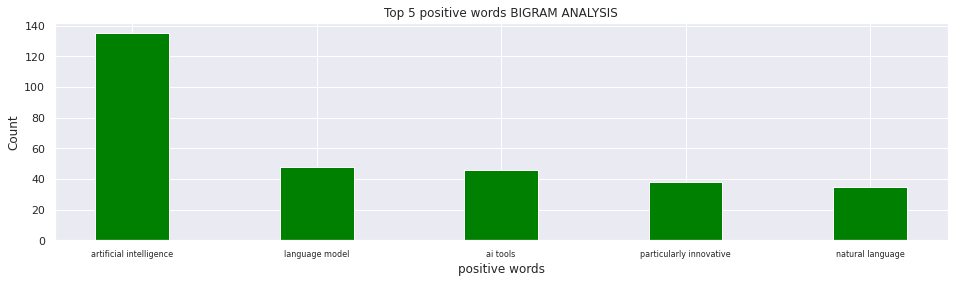

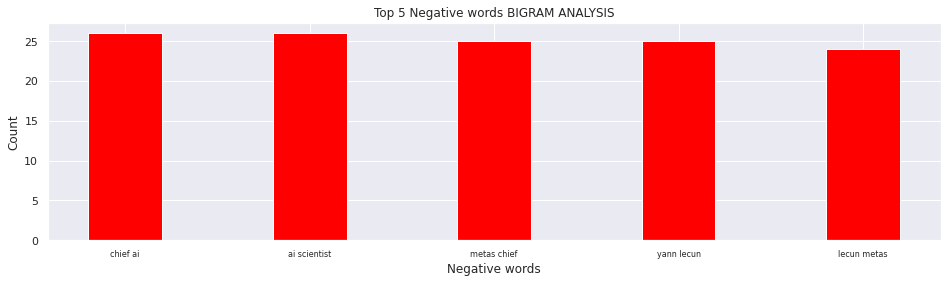

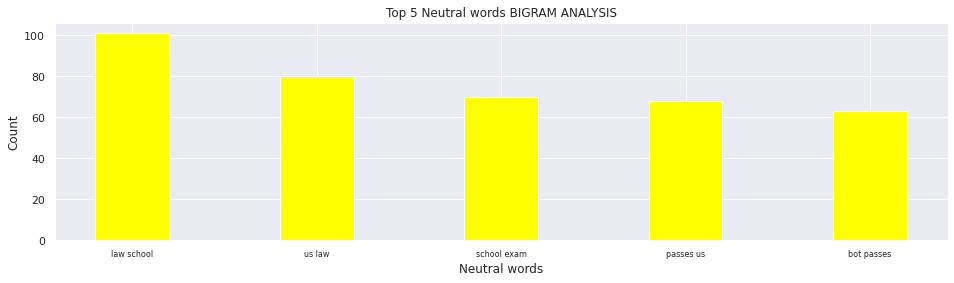

In [ ]:
creating_n_grams(tweets_df_2021,2,"BIGRAM")

### Trigrams

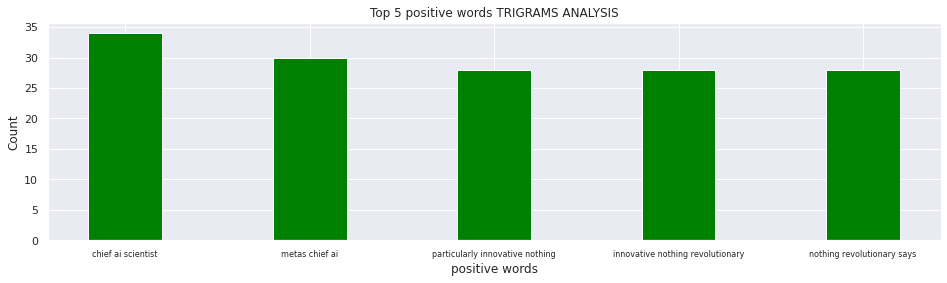

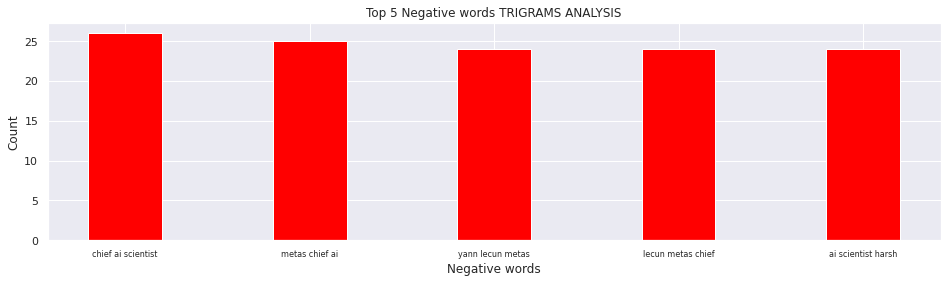

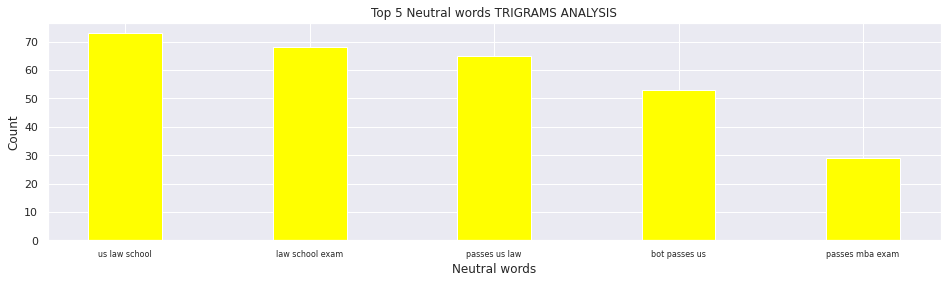

In [ ]:
creating_n_grams(tweets_df_2021,3,"TRIGRAMS")

## Emotion analysis

In [ ]:
!pip uninstall  emoji

Found existing installation: emoji 1.7.0
Uninstalling emoji-1.7.0:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/emoji-1.7.0.dist-info/*
    /usr/local/lib/python3.8/dist-packages/emoji/*
Proceed (Y/n)? y
  Successfully uninstalled emoji-1.7.0


In [ ]:
!pip install emoji==1.7.0
!pip install text2emotion

import text2emotion as te


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached emoji-1.7.0-py3-none-any.whl
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 2021

In [ ]:
happy_list =[]
angry_list=[]
surprise_list=[]
sad_list=[]
fear_list=[]

for i in tweets_df_2021['Text']:
    emotion = te.get_emotion(i)
    happy_list.append(emotion['Happy'])
    angry_list.append(emotion['Angry'])
    surprise_list.append(emotion['Surprise'])
    sad_list.append(emotion['Sad'])
    fear_list.append(emotion['Fear'])

    
tweets_df_2021['Happy_score'] = happy_list
tweets_df_2021['Angry_score'] = angry_list
tweets_df_2021['Surprise_score'] = surprise_list
tweets_df_2021['Sas_score'] = sad_list
tweets_df_2021['Fear_score'] = fear_list
tweets_df_2021

,Datetime,Tweet Id,Text,Username,Mentioned,Location,hashtag,Cleaned,Cleaned_string,Neg_score,Neu_score,Pos_score,Compound_score,Label,Happy_score,Angry_score,Surprise_score,Sas_score,Fear_score
0,2023-01-25 23:59:59+00:00,1618398306576773123,How ChatGPT and other new AI tools are being u...,marigo,None,Finland,[],"[new, ai, tools, used, lawyers, architects, co...",new ai tools used lawyers architects coders ab...,0.000,1.000,0.000,0.0000,Neutral,0.00,0.0,0.00,0.00,1.00
1,2023-01-25 23:59:59+00:00,1618398305314308097,@dj_myleaX @jordanbpeterson @wef Seems like yo...,JamesSeabridge,"[https://twitter.com/dj_myleaX, https://twitte...","Seattle, WA",[],"[seems, like, perspective, life, small, think,...",seems like perspective life small think consis...,0.000,0.762,0.238,0.3612,Positive,0.00,0.0,0.00,0.00,1.00
2,2023-01-25 23:59:11+00:00,1618398105417953280,@EvasTeslaSPlaid Am I the only one not impress...,patw3268,[https://twitter.com/EvasTeslaSPlaid],"Tampa, FL",[],"[one, impressed, chat, really, artificial, int...",one impressed chat really artificial intellige...,0.000,0.578,0.422,0.8307,Positive,0.50,0.0,0.50,0.00,0.00
3,2023-01-25 23:59:06+00:00,1618398085419524103,Having chat Gpt write conspiracy theorys about...,Patrick44640996,None,,[],"[chat, write, conspiracy, theorys, jfk, extrem...",chat write conspiracy theorys jfk extremely en...,0.293,0.431,0.275,-0.0534,Negative,0.00,0.0,0.00,0.00,0.00
4,2023-01-25 23:58:55+00:00,1618398040020365313,The Chatgpt said I’m not putting astrologers o...,MeganMistakes,None,Check out my links to find me,[],"[said, im, putting, astrologers, outta, business]",said im putting astrologers outta business,0.000,1.000,0.000,0.0000,Neutral,0.00,0.0,0.00,0.50,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2023-01-25 12:36:40+00:00,1618226343912546305,#ChatGPT clears the MBA test for a top busines...,TechStoryin,None,United States,[ChatGPT],"[clears, mba, test, top, business, school]",clears mba test top business school,0.000,0.563,0.437,0.2732,Positive,0.00,0.0,0.33,0.33,0.33
9996,2023-01-25 12:36:36+00:00,1618226328666529792,The Metaverse &amp; ChatGPT Opening Doors for ...,wmjackson,None,Global,[],"[metaverse, amp, opening, doors, blacks, hispa...",metaverse amp opening doors blacks hispanics c...,0.000,1.000,0.000,0.0000,Neutral,0.00,0.0,0.00,0.00,1.00
9997,2023-01-25 12:36:33+00:00,1618226316318478336,This whole #ChatGPT business reminds me of The...,OkkiPepernoot,None,"Den Haag, Nederland",[ChatGPT],"[whole, business, reminds, sorcerers, apprenti...",whole business reminds sorcerers apprentice kn...,0.000,0.769,0.231,0.2732,Positive,0.00,0.0,0.00,0.00,1.00
9998,2023-01-25 12:36:32+00:00,1618226312552022028,2️⃣ THE TOOL ITSELF - Who owns the model that...,franklingraves,None,"Nashville, TN",[],"[tool, owns, model, thats, built, data, sets, ...",tool owns model thats built data sets software...,0.000,1.000,0.000,0.0000,Neutral,0.00,0.0,0.00,0.00,1.00


In [ ]:
happy_avg_2021 = tweets_df_2021["Happy_score"].mean()
angry_avg_2021 = tweets_df_2021["Angry_score"].mean()
surprise_avg_2021 = tweets_df_2021["Surprise_score"].mean()
sad_avg_2021 = tweets_df_2021["Sas_score"].mean()
fear_avg_2021 = tweets_df_2021["Fear_score"].mean()

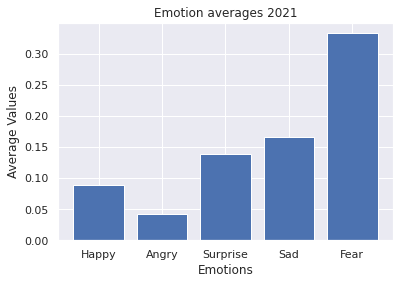

In [ ]:
import numpy as np

Categories = ['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']
values = np.array([happy_avg_2021, angry_avg_2021, surprise_avg_2021, sad_avg_2021, fear_avg_2021])
plt.bar(Categories,values)
plt.xlabel('Emotions')
plt.ylabel("Average Values")
plt.title('Emotion averages 2021')
plt.show()